<a href="https://colab.research.google.com/github/EmilSkaaning/DeepStruc/blob/main/DeepStruc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepStruc
**Github:** https://github.com/EmilSkaaning/DeepStruc

**Paper:** XXX

**Questions:** andy@chem.ku.dk or etsk@chem.ku.dk

Welcome to DeepStruc that is a Deep Generative Model (DGM) which learns the relation between PDF and atomic structure and thereby solve a structure based on a PDF!

This script guides you through a simple example of how to use DeepStruc to predict a structure on a given PDF.

Aftwerwards, you can upload a PDF and use DeepStruc to predict the structure.


# First install requirements for DeepStruc (this step takes 5 - 10 minutes)

In [3]:
%%capture
#!git clone https://github.com/EmilSkaaning/DeepStruc
!wget https://sid.erda.dk/share_redirect/Djfbtt1TEz
!unzip Djfbtt1TEz
!pip3 install torch==1.10.1+cpu torchvision==0.11.2+cpu torchaudio==0.10.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
!pip install pytorch_lightning torch-geometric==1.7.2 torch-scatter
!pip3 install torch-sparse -f https://data.pyg.org/whl/torch-1.10.1+cpu.html
!pip install matplotlib==3.4.3 ase nglview ipywidgets
from google.colab import output, files
from ase.io import read
from ase.visualize import view
from IPython.display import Image
import shutil
import os
os.chdir("DeepStruc-main")


# Example of how to use DeepStruc on a simulated dataset

We here provide an example of how to use DeepStruc on simulated data. However, just upload the last line in the next box to use DeepStruc on a PDF from your local computer.
The script can both take a single PDF or a directory of PDFs as input.

Be aware that the PDF(s) will be made to have an r-range between 2 - 30 Å in steps of 0.01 Å (2800 points PDF). Any data outside this range will not be used. Check the dataformat of our datasets (often made with PDFGui) if in doubt.


In [15]:
PDFFile = "/data/PDFs_simulated/graph_BCC_h_4_k_7_l_8_atom_Cr_lc_2.38.gr" #"data/PDFs_simulated/graph_BCC_h_4_k_7_l_8_atom_Cr_lc_2.38.gr" # Path to PDF(s).
Nstructures = 10 # Number of samples/structures generated for each unique PDF
structure = 1 # Which of the Nstructures to visualize. (Goes from 0 to Nstructures - 1) 
sigma = 3 # Sample to '-s' sigma in the normal distribution
plot = True # Plots sampled structures on top of DeepStruc training data.

# Outcomment the following line to upload experimental PDF(s)
#PDFFile = list(files.upload())[0] # Upload PDF(s) from local computer

## Predict with DeepStruc

In [16]:
# Use DeepStruc on the uploaded PDF(s)
!python predict.py -d $PDFFile -n $Nstructures -s $sigma -p $plot

Global seed set to 37
Global seed set to 37
Global seed set to 37
Global seed set to 37

Project name is: ./DeepStruc_2022-02-01_19-20-13-175901

Plotting DeepStruc training + validation data.
100% 2994/2994 [00:28<00:00, 105.45it/s]

Plotting DeepStruc structure sampling.
100% 1/1 [00:00<00:00,  6.08it/s]

Saving predicted structures as XYZ files.
100% 10/10 [00:00<00:00, 177.33it/s]


## Visualization of latent space

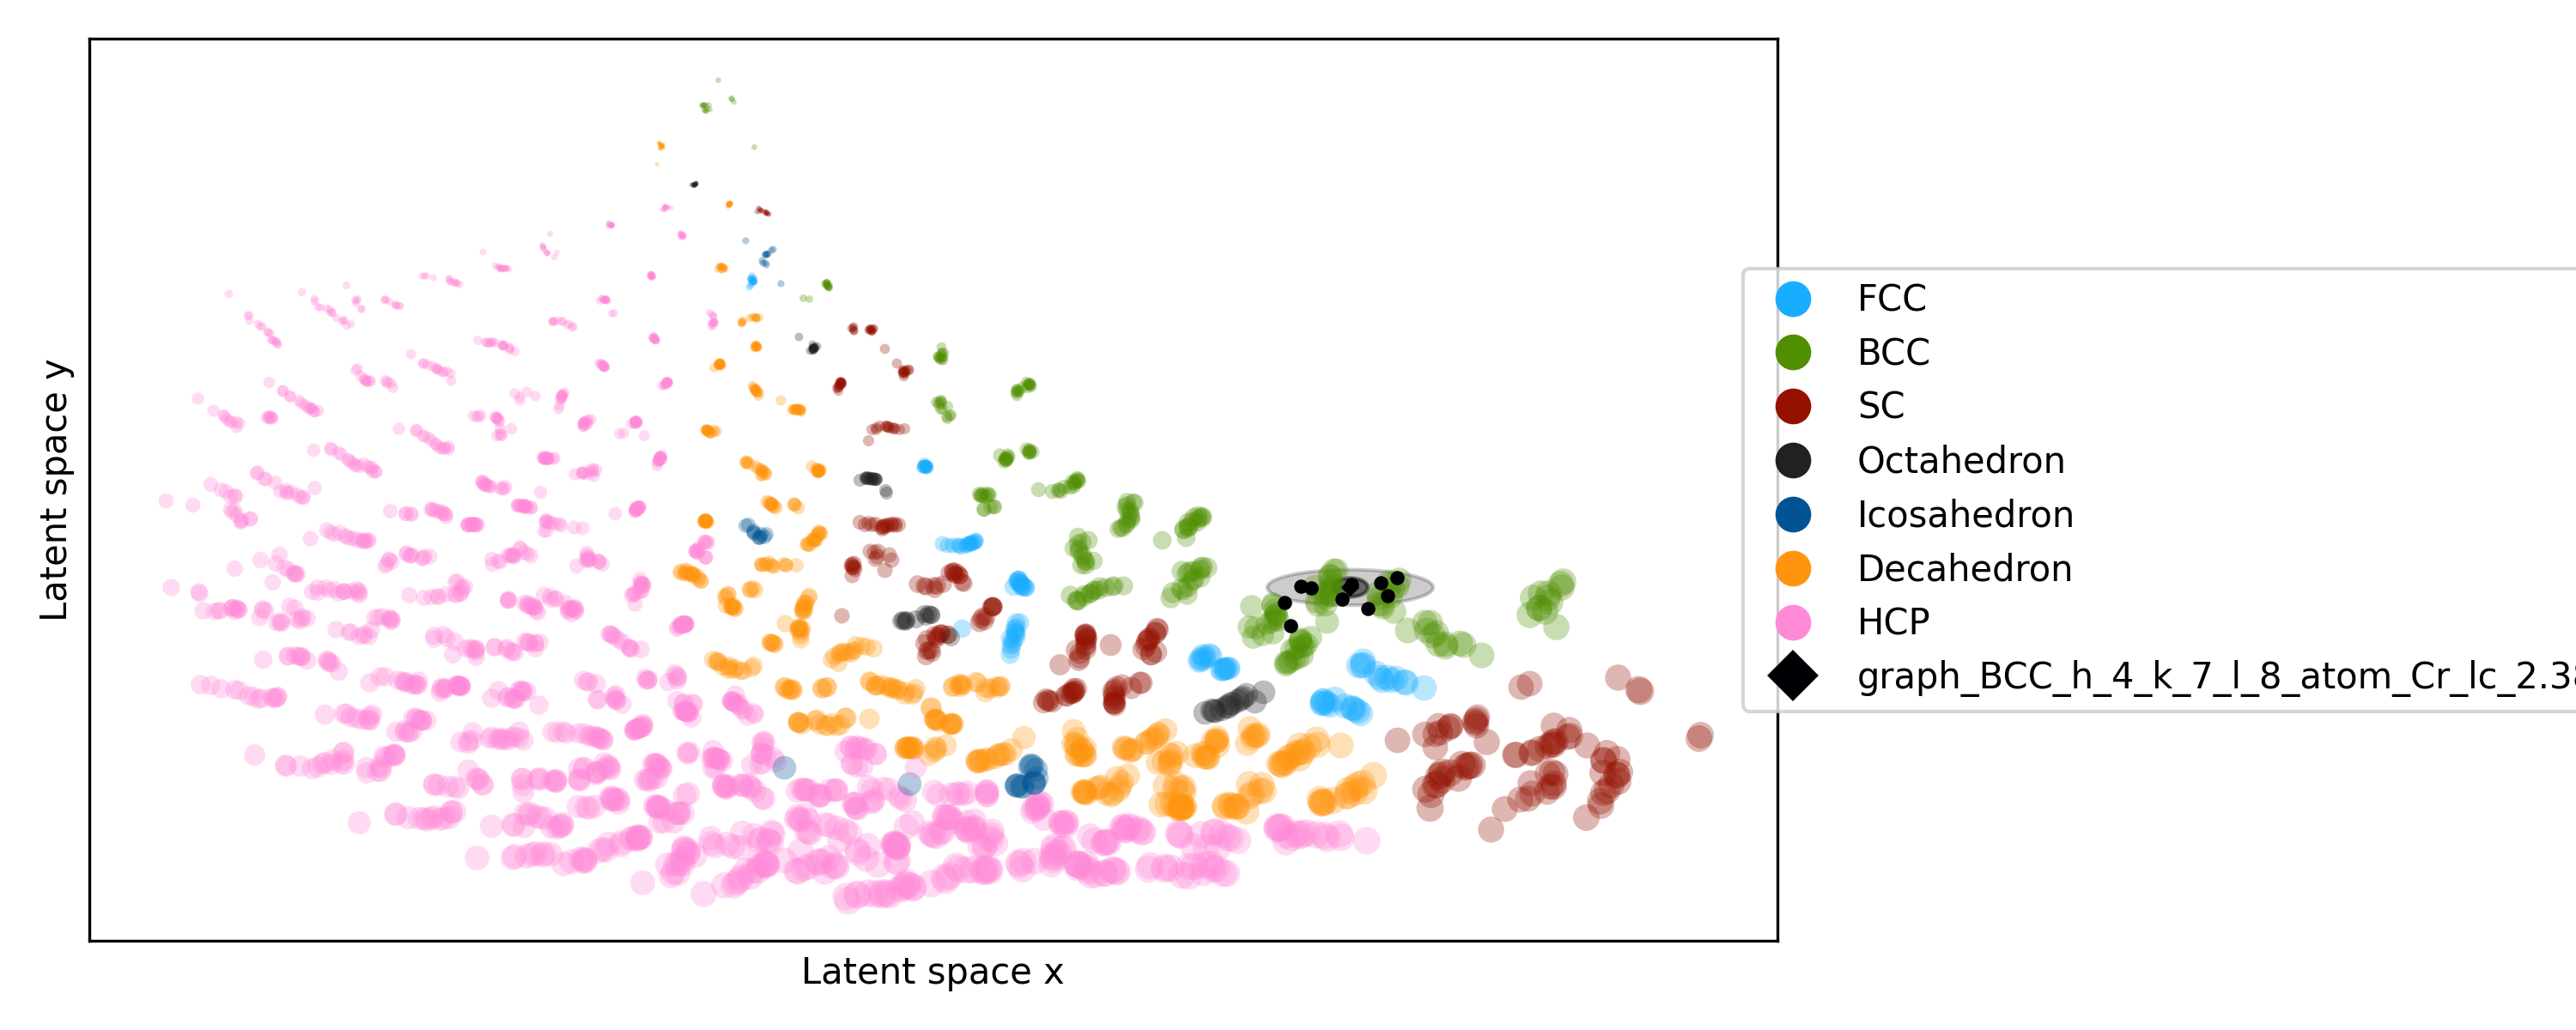

In [17]:
# Get the latest results
all_subdirs = [d for d in os.listdir('.') if os.path.isdir(d)]
latest_subdir = max(all_subdirs, key=os.path.getmtime)

# Plot the latent space
Image(latest_subdir + '/ls.png')

## Visualization of a reconstructed structure 

In [18]:
# Get folder of structures
subfolder = [f.path for f in os.scandir(latest_subdir) if f.is_dir()]

# Define which structure to plot and plot it
output.enable_custom_widget_manager()
view(read(subfolder[0] + "/" + os.listdir(subfolder[0])[structure]) , viewer='ngl')

**Be aware** that DeepStruc are only created to predict mono-metallic nanoparticles (MMNP) of up to 200 atoms. If the PDF file is not a MMNP, it is highly likely that DeepStruc will not output an meaningful structure.




## Download the latest results


In [ ]:
# Download the latest results
shutil.make_archive(latest_subdir, 'zip', latest_subdir)
files.download(latest_subdir + ".zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cite
If you use DeepStruc, please consider citing our paper. Thanks in advance!
```
@article{kjær2022DeepStruc,
title={DeepStruc: Towards structure solution from pair distribution function data using deep generative models},
author={Emil T. S. Kjær, Andy S. Anker, Marcus N. Weng1, Simon J. L. Billinge, Raghavendra Selvan, Kirsten M. Ø. Jensen},
year={2022}}
```

# LICENSE
This project is licensed under the GNU GENERAL PUBLIC LICENSE Version 3 - see the LICENSE file at https://github.com/EmilSkaaning/DeepStruc/blob/main/LICENSE.md for details.